### __Hyperparameter Tuning Experiment - Scaling & PCA Testing__

#### Reference Links:
> - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
> - https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
> - https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/
> - https://medium.com/aiplusoau/hyperparameter-tuning-a5fe69d2a6c7
> - https://www.kaggle.com/code/prashant111/catboost-classifier-in-python/notebook
> - https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_grid_search


In [1]:
#import the required packages here
# import libraries
import numpy as np
import pandas as pd
import io
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image


# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import seaborn
import seaborn as sns

# import plotly graph objects
import plotly.graph_objs as go
import plotly.express as px


# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, FeatureUnion
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### __Import data from csv files__

In [2]:
# import data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

print('\nTrain Data:')
train_df.info()
train_df

print('\nTest Data:')
test_df.info()
test_df


Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    344 non-null    int64  
 1   mean radius              344 non-null    float64
 2   mean texture             344 non-null    float64
 3   mean perimeter           344 non-null    float64
 4   mean area                344 non-null    float64
 5   mean smoothness          344 non-null    float64
 6   mean compactness         344 non-null    float64
 7   mean concavity           344 non-null    float64
 8   mean concave points      344 non-null    float64
 9   mean symmetry            344 non-null    float64
 10  mean fractal dimension   344 non-null    float64
 11  radius error             344 non-null    float64
 12  texture error            344 non-null    float64
 13  perimeter error          344 non-null    float64
 14  area error   

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
1,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
2,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
3,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
4,5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1
340,560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
341,562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,0.2128,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,0
342,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,0



Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    100 non-null    int64  
 1   mean radius              100 non-null    float64
 2   mean texture             100 non-null    float64
 3   mean perimeter           100 non-null    float64
 4   mean area                100 non-null    float64
 5   mean smoothness          100 non-null    float64
 6   mean compactness         100 non-null    float64
 7   mean concavity           100 non-null    float64
 8   mean concave points      100 non-null    float64
 9   mean symmetry            100 non-null    float64
 10  mean fractal dimension   100 non-null    float64
 11  radius error             100 non-null    float64
 12  texture error            100 non-null    float64
 13  perimeter error          100 non-null    float64
 14  area error     

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,...,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464,1
1,170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,...,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771,1
2,84,12.00,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,...,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924,1
3,456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,0.1799,...,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220,1
4,85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,...,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,0.1990,...,19.14,113.10,861.5,0.12350,0.25500,0.21140,0.12510,0.3153,0.08960,1
96,307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,1
97,219,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,...,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,0
98,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,0


#### __Scale & Dimensionality Reduction__

In [13]:
train_df = train_df.drop(['index'], axis=1)

In [39]:
# start time to measure the time of the program execution
start_time = time.time()

# Scale data
from sklearn.preprocessing import MinMaxScaler

y = train_df['target']
X = train_df.drop(['target'], axis=1)

# perform a robust scaler transform of the dataset
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.02043437957763672 seconds ---


(344, 30)

array([3.70512994e-01, 1.32129695e-01, 5.58475292e-02, 4.32322966e-02,
       2.89744158e-02, 2.15827057e-02, 1.15253922e-02, 8.71197324e-03,
       7.54159214e-03, 7.16046056e-03, 5.95351362e-03, 5.68930682e-03,
       5.05007440e-03, 2.89981108e-03, 1.97718602e-03, 1.64182939e-03,
       1.19864790e-03, 1.15582186e-03, 7.80809056e-04, 6.58435083e-04,
       6.17277412e-04, 5.72849130e-04, 4.12963358e-04, 3.68630247e-04,
       3.09016445e-04, 2.27492116e-04, 1.28860033e-04, 3.86337755e-05,
       1.74502937e-05, 4.14723257e-06])

array([5.16810884e-01, 1.84301402e-01, 7.78990518e-02, 6.03026662e-02,
       4.04150291e-02, 3.01046856e-02, 1.60762193e-02, 1.21519155e-02,
       1.05194068e-02, 9.98778453e-03, 8.30427187e-03, 7.93574242e-03,
       7.04410764e-03, 4.04480801e-03, 2.75788238e-03, 2.29010942e-03,
       1.67193671e-03, 1.61220072e-03, 1.08911327e-03, 9.18419657e-04,
       8.61010788e-04, 7.99039899e-04, 5.76022869e-04, 5.14184729e-04,
       4.31032284e-04, 3.17317891e-04, 1.79740707e-04, 5.38884087e-05,
       2.43405815e-05, 5.78477669e-06])

1.0000000000000002

,explained_variance,pca_component
0,0.516811,1
1,0.184301,2
2,0.077899,3
3,0.060303,4
4,0.040415,5
5,0.030105,6
6,0.016076,7
7,0.012152,8
8,0.010519,9
9,0.009988,10


,explained_variance,pca_component,cumulative_explained_variance
0,0.516811,1,0.516811
1,0.184301,2,0.701112
2,0.077899,3,0.779011
3,0.060303,4,0.839314
4,0.040415,5,0.879729
5,0.030105,6,0.909834
6,0.016076,7,0.925910
7,0.012152,8,0.938062
8,0.010519,9,0.948581
9,0.009988,10,0.958569




--- 0.37575769424438477 seconds ---


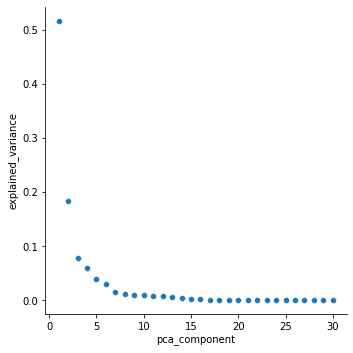

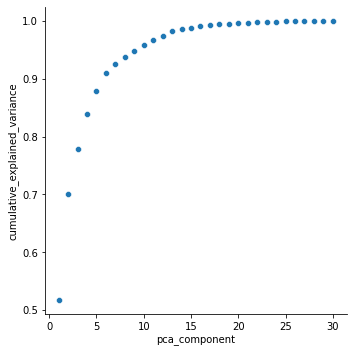

In [50]:
# start time to measure the time of the program execution
start_time = time.time()

# convert scaled X to dataframe for PCA process
df_scale = pd.DataFrame(X_scaled, columns = X.columns.tolist())

# PCA
pca = PCA()
pca_data = pca.fit_transform(df_scale)
pca_data.shape

# check PCA explained variance
pca.explained_variance_
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

# summary of PCA variance
pca_variance_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['explained_variance'])
pca_variance_df['pca_component'] = [i + 1 for i in range(30)]
pca_variance_df

# visualize PCA variance
sns.relplot(data=pca_variance_df, x='pca_component', y ='explained_variance')

# add cumulative variance to summary PCA above
pca_variance_df['cumulative_explained_variance'] = pca_variance_df['explained_variance'].cumsum()
pca_variance_df

# visualize PCA variance cumulative
sns.relplot(data=pca_variance_df, x='pca_component', y ='cumulative_explained_variance')

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __PCA & Scaling Test on Models__

#### Machine Learning Models:
> - Logistic Regression
> - Gausian Naive Bayes
> - KNN
> - Decision Tree
> - Random Forest
> - Stochastic Gradient Descent (SGD)
> - SVM
> - Catboost
> - XGBoost

In [15]:
y = train_df['target']
X = train_df.drop(['target'], axis=1)

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637


In [16]:
# start time to measure the time of the program execution
start_time = time.time()

# split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.000997781753540039 seconds ---


In [20]:
# Logistic Regression

# start time to measure the time of the program execution
start_time = time.time()

lg = LogisticRegression()
pipe_lg = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', lg)])
pipe_lg.fit(X_train, y_train)
y_pred_lg = pipe_lg.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', LogisticRegression())])



--- 0.01898956298828125 seconds ---


In [21]:
# Gausian Naive Bayes

# start time to measure the time of the program execution
start_time = time.time()

gnb = GaussianNB()
pipe_gnb = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', gnb)])
pipe_gnb.fit(X_train, y_train)
y_pred_gnb = pipe_gnb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', GaussianNB())])



--- 0.006980180740356445 seconds ---


In [22]:
# KNN

# start time to measure the time of the program execution
start_time = time.time()

knn = KNeighborsClassifier()
pipe_knn = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', knn)])
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', KNeighborsClassifier())])



--- 0.02685832977294922 seconds ---


In [23]:
# Decision Tree

# start time to measure the time of the program execution
start_time = time.time()

dt = DecisionTreeClassifier()
pipe_dt = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', dt)])
pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', DecisionTreeClassifier())])



--- 0.02116870880126953 seconds ---


In [24]:
# Random Forest

# start time to measure the time of the program execution
start_time = time.time()

rf = RandomForestClassifier()
pipe_rf = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', rf)])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', RandomForestClassifier())])



--- 0.10022974014282227 seconds ---


In [25]:
# Stochastic Gradient Descent (SGD)

# start time to measure the time of the program execution
start_time = time.time()

sgd = SGDClassifier()
pipe_sgd = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', sgd)])
pipe_sgd.fit(X_train, y_train)
y_pred_sgd = pipe_sgd.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', SGDClassifier())])



--- 0.013969659805297852 seconds ---


In [26]:
# Support Vector Machine (SVM)

# start time to measure the time of the program execution
start_time = time.time()

svc = SVC(gamma='auto')
pipe_svc = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', svc)])
pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', SVC(gamma='auto'))])



--- 0.012839794158935547 seconds ---


In [27]:
# CatBoost

# start time to measure the time of the program execution
start_time = time.time()

cb = CatBoostClassifier()
pipe_cb = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', cb)])
pipe_cb.fit(X_train, y_train)
y_pred_cb = pipe_cb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Learning rate set to 0.005936
0:	learn: 0.6850609	total: 175ms	remaining: 2m 54s
1:	learn: 0.6754172	total: 176ms	remaining: 1m 27s
2:	learn: 0.6664846	total: 177ms	remaining: 58.9s
3:	learn: 0.6583197	total: 178ms	remaining: 44.3s
4:	learn: 0.6511296	total: 179ms	remaining: 35.6s
5:	learn: 0.6437272	total: 180ms	remaining: 29.8s
6:	learn: 0.6366138	total: 181ms	remaining: 25.6s
7:	learn: 0.6293797	total: 181ms	remaining: 22.5s
8:	learn: 0.6221870	total: 182ms	remaining: 20.1s
9:	learn: 0.6152819	total: 183ms	remaining: 18.1s
10:	learn: 0.6085992	total: 184ms	remaining: 16.6s
11:	learn: 0.6017476	total: 185ms	remaining: 15.3s
12:	learn: 0.5942534	total: 186ms	remaining: 14.1s
13:	learn: 0.5863473	total: 187ms	remaining: 13.2s
14:	learn: 0.5811682	total: 188ms	remaining: 12.3s
15:	learn: 0.5736478	total: 189ms	remaining: 11.6s
16:	learn: 0.5669557	total: 190ms	remaining: 11s
17:	learn: 0.5598890	total: 190ms	remaining: 10.4s
18:	learn: 0.5530938	total: 191ms	remaining: 9.87s
19:	learn: 

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000025B0B5B9D60>)])



--- 1.2145843505859375 seconds ---


In [28]:
# XGBoost

# start time to measure the time of the program execution
start_time = time.time()

xgb = XGBClassifier()
pipe_xgb = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', xgb)])
pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, re



--- 0.06776833534240723 seconds ---


In [29]:
# start time to measure the time of the program execution
start_time = time.time()

# function for performance metrics - scores

lg_accuracy = accuracy_score(y_test, y_pred_lg)
lg_f1 = f1_score(y_test, y_pred_lg, average='macro')
lg_precision = precision_score(y_test, y_pred_lg, average='macro')
lg_recall = recall_score(y_test, y_pred_lg, average='macro')

gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_f1 = f1_score(y_test, y_pred_gnb, average='macro')
gnb_precision = precision_score(y_test, y_pred_gnb, average='macro')
gnb_recall = recall_score(y_test, y_pred_gnb, average='macro')

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_precision = precision_score(y_test, y_pred_rf, average='macro')
rf_recall = recall_score(y_test, y_pred_rf, average='macro')

sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
sgd_f1 = f1_score(y_test, y_pred_sgd, average='macro')
sgd_precision = precision_score(y_test, y_pred_sgd, average='macro')
sgd_recall = recall_score(y_test, y_pred_sgd, average='macro')

svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc, average='macro')
svc_precision = precision_score(y_test, y_pred_svc, average='macro')
svc_recall = recall_score(y_test, y_pred_svc, average='macro')

cb_accuracy = accuracy_score(y_test, y_pred_cb)
cb_f1 = f1_score(y_test, y_pred_cb, average='macro')
cb_precision = precision_score(y_test, y_pred_cb, average='macro')
cb_recall = recall_score(y_test, y_pred_cb, average='macro')

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='macro')
xgb_precision = precision_score(y_test, y_pred_xgb, average='macro')
xgb_recall = recall_score(y_test, y_pred_xgb, average='macro')

df_cl_metrics = pd.DataFrame({
    'LogisticR': [lg_accuracy, lg_f1, lg_precision, lg_recall],
    'GNB': [gnb_accuracy, gnb_f1, gnb_precision, gnb_recall],
    'KNN': [knn_accuracy, knn_f1, knn_precision, knn_recall],  
    'Decision Tree': [dt_accuracy, dt_f1, dt_precision, dt_recall],
    'Random Forest': [rf_accuracy, rf_f1, rf_precision, rf_recall],
    'SGD': [sgd_accuracy, sgd_f1, sgd_precision, sgd_recall],
    'SVC': [svc_accuracy, svc_f1, svc_precision, svc_recall],
    'CatBoost': [cb_accuracy, cb_f1, cb_precision, cb_recall],
    'XGB': [xgb_accuracy, xgb_f1, xgb_precision, xgb_recall]
                                }, index=['accuracy', 'f1_score', 'precision', 'recall'])

df_cl_metrics

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,LogisticR,GNB,KNN,Decision Tree,Random Forest,SGD,SVC,CatBoost,XGB
accuracy,0.927536,0.913043,0.927536,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029
f1_score,0.926984,0.912584,0.926984,0.941723,0.941723,0.942017,0.941723,0.941723,0.941919
precision,0.932051,0.915110,0.932051,0.944397,0.944397,0.942437,0.944397,0.944397,0.941919
recall,0.925505,0.911616,0.925505,0.940657,0.940657,0.943182,0.940657,0.940657,0.941919




--- 0.027364015579223633 seconds ---


In [30]:
# start time to measure the time of the program execution
start_time = time.time()

sum_metrics_draft = df_cl_metrics.copy()

sum_metrics_draft = pd.DataFrame(np.vstack([sum_metrics_draft.columns, sum_metrics_draft]), 
                        index=['models', 'accuracy', 'f1_score', 'precision', 'recall'])

sum_metrics = sum_metrics_draft.T
sum_metrics

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,models,accuracy,f1_score,precision,recall
0,LogisticR,0.927536,0.926984,0.932051,0.925505
1,GNB,0.913043,0.912584,0.91511,0.911616
2,KNN,0.927536,0.926984,0.932051,0.925505
3,Decision Tree,0.942029,0.941723,0.944397,0.940657
4,Random Forest,0.942029,0.941723,0.944397,0.940657
5,SGD,0.942029,0.942017,0.942437,0.943182
6,SVC,0.942029,0.941723,0.944397,0.940657
7,CatBoost,0.942029,0.941723,0.944397,0.940657
8,XGB,0.942029,0.941919,0.941919,0.941919




--- 0.015540599822998047 seconds ---


[Text(0, 0, '0.927536'),
 Text(0, 0, '0.913043'),
 Text(0, 0, '0.927536'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029')]



--- 0.024931669235229492 seconds ---


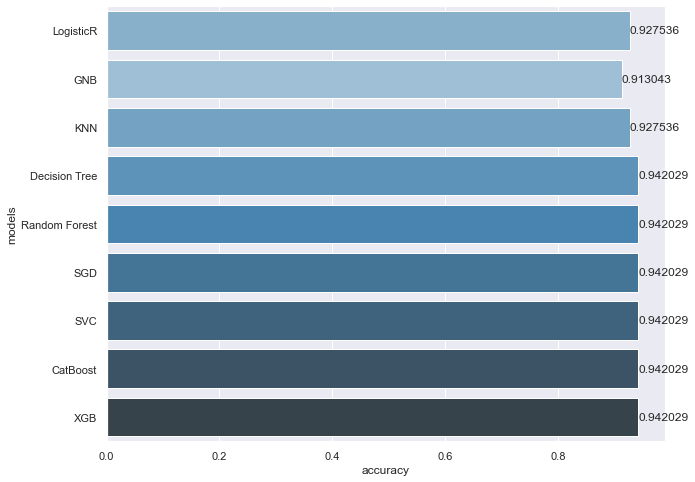

In [31]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_metrics.accuracy.sort_values().index

palette = sns.color_palette('Blues_d', len(ranks))
ax = sns.barplot(x='accuracy', y='models', palette=np.array(palette)[ranks], data=sum_metrics)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '0.926984'),
 Text(0, 0, '0.912584'),
 Text(0, 0, '0.926984'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.942017'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941919')]



--- 0.045098304748535156 seconds ---


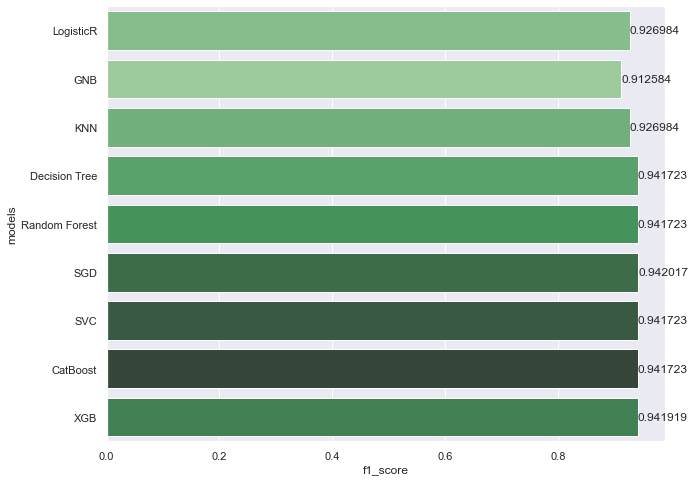

In [32]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_metrics.f1_score.sort_values().index

palette = sns.color_palette('Greens_d', len(ranks))
ax = sns.barplot(x='f1_score', y='models', palette=np.array(palette)[ranks], data=sum_metrics)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Hyperparameter Tuning: CatBoost__

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# set up our parameters grid
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'n_estimators': [60,100,140,180,220],
    'learning_rate': [0.1, 0.01, 0.05],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
    }

# Fit CatBoost Classifier
cb2 = CatBoostClassifier()

#main_pipeline = Pipeline(steps=[('scale', MinMaxScaler()),
#                           ('model', cb2)])

# create a Grid Search object
grid_search = GridSearchCV(estimator=cb2, 
                           param_grid=param_grid, 
                           scoring ='accuracy', cv = 5)    

# fit the model and tune parameters
grid_search.fit(X_train, y_train)

#returns the estimator with the best performance
print(grid_search.best_estimator_)

#returns the best score
print(grid_search.best_score_)

#returns the best parameters
print(grid_search.best_params_)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

0:	learn: 0.6080842	total: 12.9ms	remaining: 761ms
1:	learn: 0.5134436	total: 13.7ms	remaining: 397ms
2:	learn: 0.4402212	total: 14.4ms	remaining: 273ms
3:	learn: 0.3706075	total: 15.1ms	remaining: 212ms
4:	learn: 0.3173420	total: 15.8ms	remaining: 174ms
5:	learn: 0.2748465	total: 16.6ms	remaining: 149ms
6:	learn: 0.2470948	total: 17.3ms	remaining: 131ms
7:	learn: 0.2254291	total: 18.1ms	remaining: 117ms
8:	learn: 0.2038979	total: 18.8ms	remaining: 106ms
9:	learn: 0.1883532	total: 19.5ms	remaining: 97.6ms
10:	learn: 0.1753187	total: 20.2ms	remaining: 90.2ms
11:	learn: 0.1605271	total: 21ms	remaining: 84ms
12:	learn: 0.1425640	total: 21.7ms	remaining: 78.5ms
13:	learn: 0.1286840	total: 22.4ms	remaining: 73.5ms
14:	learn: 0.1204364	total: 23ms	remaining: 69ms
15:	learn: 0.1126023	total: 23.6ms	remaining: 64.9ms
16:	learn: 0.1051030	total: 24.2ms	remaining: 61.3ms
17:	learn: 0.0995395	total: 24.8ms	remaining: 58ms
18:	learn: 0.0962820	total: 25.5ms	remaining: 54.9ms
19:	learn: 0.0932164	t

In [119]:
# CatBoost

# start time to measure the time of the program execution
start_time = time.time()

cbt = CatBoostClassifier(max_depth= 7, n_estimators=100,
                        learning_rate=0.01, l2_leaf_reg=3)
pipe_cbt = Pipeline(steps=[('pca', PCA(n_components=3)),
                           ('model', cbt)])
pipe_cbt.fit(X_train, y_train)
y_pred_cbt = pipe_cbt.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

0:	learn: 0.6881734	total: 2.5ms	remaining: 247ms
1:	learn: 0.6836597	total: 4.1ms	remaining: 201ms
2:	learn: 0.6780867	total: 5.34ms	remaining: 173ms
3:	learn: 0.6724673	total: 6.53ms	remaining: 157ms
4:	learn: 0.6671184	total: 7.79ms	remaining: 148ms
5:	learn: 0.6620663	total: 8.9ms	remaining: 139ms
6:	learn: 0.6572520	total: 10ms	remaining: 133ms
7:	learn: 0.6524638	total: 11.2ms	remaining: 129ms
8:	learn: 0.6484783	total: 12.3ms	remaining: 125ms
9:	learn: 0.6435421	total: 13.5ms	remaining: 121ms
10:	learn: 0.6389841	total: 14.6ms	remaining: 118ms
11:	learn: 0.6353732	total: 15.8ms	remaining: 116ms
12:	learn: 0.6304575	total: 17ms	remaining: 113ms
13:	learn: 0.6262592	total: 18.1ms	remaining: 111ms
14:	learn: 0.6224153	total: 19.2ms	remaining: 109ms
15:	learn: 0.6185646	total: 20.4ms	remaining: 107ms
16:	learn: 0.6141649	total: 21.5ms	remaining: 105ms
17:	learn: 0.6103531	total: 22.7ms	remaining: 103ms
18:	learn: 0.6056966	total: 23.8ms	remaining: 101ms
19:	learn: 0.6015964	total: 2

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000002F5AE5E5D90>)])



--- 0.15772724151611328 seconds ---


In [121]:
cb_accuracy2 = accuracy_score(y_test, y_pred_cbt)
cb_f12 = f1_score(y_test, y_pred_cbt, average='macro')
cb_precision2 = precision_score(y_test, y_pred_cbt, average='macro')
cb_recall2 = recall_score(y_test, y_pred_cbt, average='macro')

cb_accuracy2
cb_f12
cb_precision2
cb_recall2

0.9420289855072463

0.9417229729729728

0.9443972835314092

0.9406565656565656